## Group Nucleus - NYC For-Hire Vehicle (FHV) Aggregate Report

In [49]:
#import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Transformation of Data with conversion of type to datetime and categories as well as recategorization of variables

In [50]:
#read in the latest CSV file
data = pd.read_csv('FHV_Base_Aggregate_Report.csv')

In [51]:
#create a new column 'year_month' using the 'Year' and 'Month' columns and set to 1st day of the month
data['year_month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

#finding the dimensions of the imported data
data.shape

(34540, 10)

#### Recategorization of Variables to Explore Market Share Trends between private cars and taxis

In [52]:
#Intent: we want to explore the market share trends between private cars and taxis

#now we want to recategorize the different companies into: (a) private cars; and (b) taxis
list_of_companies = data['Base Name'].tolist()

private_cars = ['LYFT','UBER','JUNO', 'VIA']
taxis_with_dup_names = []
for i in range(len(list_of_companies)): 
    if (list_of_companies[i] != 'LYFT' and list_of_companies[i] != 'UBER' and list_of_companies[i] != 'JUNO' and list_of_companies[i] != 'VIA'):
        taxis_with_dup_names.append(list_of_companies[i])

#now, lets remove the duplicate companies names within taxis
taxis = []
for i in taxis_with_dup_names:
    if i not in taxis:
        taxis.append(i)
        
print("The number of unique private cars and taxis companies are", len(private_cars), "and", len(taxis), "respectively.")

The number of unique private cars and taxis companies are 4 and 868 respectively.


#### Recategorization of Variables to Explore Market Share Trends between private cars (further split into the 4 major competitors namely Uber, Lyft, Juno and Via) and taxis

In [53]:
#Intent: we want to explore the market share trends between the 4 major private cars companies and taxis

#next we want to recategorize the different companies into: (a) UBER; (b) LYFT; (c) JUNO; (d) VIA; and (e) taxis
#earlier, we have already populated the list of unique taxi companies names

uber = ['UBER']
lyft = ['LYFT']
juno = ['JUNO']
via = ['VIA']


In [54]:
#next we want to create a new column 'private_cars_or_taxis' that will only have 2 categories namely 'private_cars' and 'taxis'
#first we set up a dictionary
private_cars_taxis = {"private_cars": private_cars, "taxis": taxis}

#using list comprehension
new_labels = {v: k for k,vv in private_cars_taxis.items() for v in vv}
new_labels

#creating a new categorical column 'private_cars_or_taxis' with the map method
data['private_cars_or_taxis'] = data['Base Name'].map(new_labels).astype("category")


In [56]:
#now, we want to create a new column 'uber_lyft_juno_via_taxis' that will only have 5 categories namely
#'UBER', 'LYFT', 'JUNO', 'VIA' and 'taxis'
#first we set up a dictionary
uber_lyft_juno_via_taxis = {"UBER": uber, "LYFT": lyft, "JUNO": juno, "VIA": via, "taxis": taxis}

#using list comprehension
new_labels = {v: k for k,vv in uber_lyft_juno_via_taxis.items() for v in vv}
new_labels

#creating a new categorical column 'private_cars_or_taxis' with the map method
data['uber_lyft_juno_via_taxis'] = data['Base Name'].map(new_labels).astype("category")


#### Recategorization of Variables to Explore Seasonal Effects on Demand

In [57]:
#Intent: we want to explore the trends of trips in tandem with seasons (i.e. Spring, Summer, Fall, Winter)
#this will help in better allocation of resources with seasonal fluctuations

#now we want to recategorize the different months into: (a) spring; (b) summer; (c) fall; and (d) winter

spring = ['January','February','March']
summer = ['April','May','June']
fall = ['July','August','September']
winter = ['October','November','December']


In [58]:
#next we want to create a new column 'seasons' that will only have 4 categories namely 'spring', 'summer', 'fall' and 'winter'
#first we set up a dictionary
seasons = {"spring": spring, "summer": summer, "fall": fall, "winter": winter}

#using list comprehension
new_labels = {v: k for k,vv in seasons.items() for v in vv}
new_labels

#creating a new categorical column 'private_cars_or_taxis' with the map method
data['seasons'] = data['Month Name'].map(new_labels).astype("category")


#### Ensure that the transformation was done successfully with the correct data types

In [59]:
#check that the new columns have been created successfully with the correct data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34540 entries, 0 to 34539
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Base License Number            34540 non-null  object        
 1   Base Name                      34540 non-null  object        
 2   DBA                            7131 non-null   object        
 3   Year                           34540 non-null  int64         
 4   Month                          34540 non-null  int64         
 5   Month Name                     34540 non-null  object        
 6   Total Dispatched Trips         34540 non-null  int64         
 7   Total Dispatched Shared Trips  34540 non-null  int64         
 8   Unique Dispatched Vehicles     34540 non-null  int64         
 9   year_month                     34540 non-null  datetime64[ns]
 10  private_cars_or_taxis          34540 non-null  category      
 11  uber_lyft_juno_

In [60]:
#finding number of records and variables (with the additional 'year_month', private_cars_or_taxis', 'uber_lyft_juno_via_taxis' and 'seasons' columns)
data.shape

(34540, 13)

#### Visual inspection of the rows and cols of transformed data

In [61]:
#looking at the first few records
data.head()

,Base License Number,Base Name,DBA,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles,year_month,private_cars_or_taxis,uber_lyft_juno_via_taxis,seasons
0,B02627,A PEGASUS LIMOUSINE CORP.,APL LIMO,2017,5,May,276,0,10,2017-05-01,taxis,taxis,summer
1,B00477,INTA-BORO ACRES INC,NaN,2017,5,May,9751,0,175,2017-05-01,taxis,taxis,summer
2,B01386,FENIX PREMIUM CORP.,NaN,2017,5,May,10724,0,37,2017-05-01,taxis,taxis,summer
3,B01734,AMERICAN DREAM CAR SERVICE INC.,NaN,2017,10,October,22,0,1,2017-10-01,taxis,taxis,winter
4,B00411,FONE-A-CAR INC,NaN,2020,11,November,341,0,90,2020-11-01,taxis,taxis,winter


#### Summary of Numeric Variables. We are focusing on the 'Total Dispatched Trips'

In [62]:
#computing the summary of key numeric variables
data.describe()

,Year,Month,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
count,34540.000000,34540.000000,3.454000e+04,3.454000e+04,34540.000000
mean,2017.770672,6.637290,3.116322e+04,3.731392e+03,233.730776
std,1.553308,3.452892,4.893946e+05,8.867676e+04,2967.627951
min,2015.000000,1.000000,1.000000e+00,0.000000e+00,1.000000
25%,2017.000000,4.000000,3.630000e+02,0.000000e+00,8.000000
50%,2018.000000,7.000000,1.440000e+03,0.000000e+00,17.000000
75%,2019.000000,10.000000,4.791000e+03,0.000000e+00,45.000000
max,2020.000000,12.000000,1.724800e+07,4.110424e+06,79178.000000


## Commencement of using seaborn for visualization and analyses for insights

#### Using groupby method to aggregate across multiple parameters

In [63]:
#using the method groupby to populate the trips based on 'year_month' and 'private_cars_or_taxis'
total_trips_private_cars_or_taxis = data.groupby(['year_month', 'private_cars_or_taxis']).sum()
total_trips_private_cars_or_taxis


Year  Month  Total Dispatched Trips  \
year_month private_cars_or_taxis                                          
2015-01-01 private_cars             2015      1                 1871075   
           taxis                   98735     49                  828162   
2015-02-01 private_cars             2015      2                 2178305   
           taxis                   96720     96                  844752   
2015-03-01 private_cars             2015      3                 2259575   
...                                  ...    ...                     ...   
2020-10-01 taxis                  993840   4920                 1217486   
2020-11-01 private_cars             6060     33                11596862   
           taxis                  906980   4939                 1086368   
2020-12-01 private_cars             6060     36                11629785   
           taxis                  868600   5160                  979842   

                                  Total Dispatched Shared Trips  \
year_month private_cars_or_taxis                                  
2015-01-01 private_cars                                       0   
           taxis                                              0   
2015-02-01 private_cars                                       0   
           taxis                                              0   
2015-03-01 private_cars                                       0   
...                                                         ...   
2020-10-01 taxis                                              0   
2020-11-01 private_cars                                       0   
           taxis                                              0   
2020-12-01 private_cars                                       0   
           taxis                                              0   

                                  Unique Dispatched Vehicles  
year_month private_cars_or_taxis                              
2015-01-01 private_cars                                12544  
           taxis                                        7801  
2015-02-01 private_cars                                13531  
           taxis                                        7640  
2015-03-01 private_cars                                14290  
...                                                      ...  
2020-10-01 taxis                                       13029  
2020-11-01 private_cars                                81905  
           taxis                                       12140  
2020-12-01 private_cars                                80517  
           taxis                                       10769  

[144 rows x 5 columns]

#### Finding the proportion of trips fulfilled by private cars and taxis per month

In [64]:
#finding the proprtion of trips in percentage fulfilled by "private_cars" and "taxis" for each month
#this is included as a new column called 'prop_of_trips'
total_trips_private_cars_or_taxis['prop_of_trips'] = round((total_trips_private_cars_or_taxis['Total Dispatched Trips'] / total_trips_private_cars_or_taxis.groupby('year_month')['Total Dispatched Trips'].transform('sum')) * 100, 1)
total_trips_private_cars_or_taxis


Year  Month  Total Dispatched Trips  \
year_month private_cars_or_taxis                                          
2015-01-01 private_cars             2015      1                 1871075   
           taxis                   98735     49                  828162   
2015-02-01 private_cars             2015      2                 2178305   
           taxis                   96720     96                  844752   
2015-03-01 private_cars             2015      3                 2259575   
...                                  ...    ...                     ...   
2020-10-01 taxis                  993840   4920                 1217486   
2020-11-01 private_cars             6060     33                11596862   
           taxis                  906980   4939                 1086368   
2020-12-01 private_cars             6060     36                11629785   
           taxis                  868600   5160                  979842   

                                  Total Dispatched Shared Trips  \
year_month private_cars_or_taxis                                  
2015-01-01 private_cars                                       0   
           taxis                                              0   
2015-02-01 private_cars                                       0   
           taxis                                              0   
2015-03-01 private_cars                                       0   
...                                                         ...   
2020-10-01 taxis                                              0   
2020-11-01 private_cars                                       0   
           taxis                                              0   
2020-12-01 private_cars                                       0   
           taxis                                              0   

                                  Unique Dispatched Vehicles  prop_of_trips  
year_month private_cars_or_taxis                                             
2015-01-01 private_cars                                12544           69.3  
           taxis                                        7801           30.7  
2015-02-01 private_cars                                13531           72.1  
           taxis                                        7640           27.9  
2015-03-01 private_cars                                14290           71.0  
...                                                      ...            ...  
2020-10-01 taxis                                       13029            8.4  
2020-11-01 private_cars                                81905           91.4  
           taxis                                       12140            8.6  
2020-12-01 private_cars                                80517           92.2  
           taxis                                       10769            7.8  

[144 rows x 6 columns]

### Key Insight #1. Please refer to the comments in the following cell

<AxesSubplot:xlabel='year_month', ylabel='Total Dispatched Trips'>

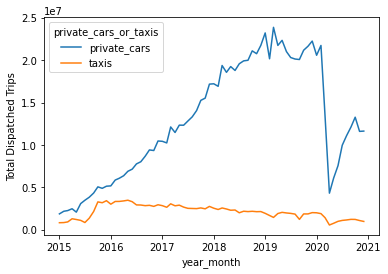

In [65]:
#Key Insight #1: we see that over the years, the private cars have grown exponentially in market size as compared to taxis
#there is a huge dip in the number of trips fulfilled by private companies in 2020. This is likely to be due to the COVID pandemic with lockdowns
#now we are looking at a recovery for private hire cars though it is still approximately half of the pre-pandemic levels

#plotting the time series of "Total Dispatched Trips" with sbtratification by 'private_cars_or_taxis'

sns.lineplot(x = "year_month", y = "Total Dispatched Trips", hue = 'private_cars_or_taxis', ci=None,
             data = total_trips_private_cars_or_taxis)

## Key Insight #2. Please refer to the comments in the following cell

<AxesSubplot:xlabel='year_month', ylabel='Count'>

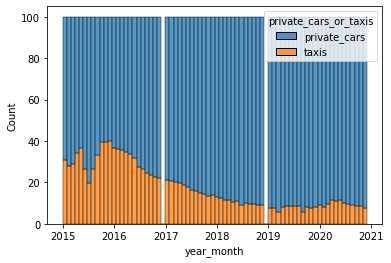

In [66]:
#Key Insight #2: Based on the stacked plot, we can see that in line with the lineplot earlier, the percentage of private_cars market share
#has increased over time even with increasing number of total rides. This implies that the private cars companies are not only
#growing in terms of number of trips but also in the percentage of overall market share.

#plotting the time series of proportion of trips fulfilled by "private_cars" and "taxis" for each month

#sns.barplot(x = "year_month", y = "prop_of_trips", hue = 'private_cars_or_taxis',
#             data = total_trips_private_cars_or_taxis)b

#finding the num of unique months. note that we need to divide by two as the index is based on 'year_month' and 'private_cars_or_taxis"
#note that the gaps in between is due to the shortcoming of binning based on the num of months in the dataset

sns.histplot(data = total_trips_private_cars_or_taxis, x='year_month', hue='private_cars_or_taxis', weights='prop_of_trips',multiple='stack', bins = 74)

In [67]:
#using the method groupby to populate the trips based on 'year_month' and 'private_cars_or_taxis'
total_trips_privateuber_lyft_juno_via_taxis = data.groupby(['year_month', 'uber_lyft_juno_via_taxis']).sum()
total_trips_privateuber_lyft_juno_via_taxis


Year   Month  Total Dispatched Trips  \
year_month uber_lyft_juno_via_taxis                                             
2015-01-01 JUNO                           NaN     NaN                     NaN   
           LYFT                           NaN     NaN                     NaN   
           UBER                        2015.0     1.0               1871075.0   
           VIA                            NaN     NaN                     NaN   
           taxis                      98735.0    49.0                828162.0   
...                                       ...     ...                     ...   
2020-12-01 JUNO                           NaN     NaN                     NaN   
           LYFT                        2020.0    12.0               3022808.0   
           UBER                        2020.0    12.0               8479682.0   
           VIA                         2020.0    12.0                127295.0   
           taxis                     868600.0  5160.0                979842.0   

                                     Total Dispatched Shared Trips  \
year_month uber_lyft_juno_via_taxis                                  
2015-01-01 JUNO                                                NaN   
           LYFT                                                NaN   
           UBER                                                0.0   
           VIA                                                 NaN   
           taxis                                               0.0   
...                                                            ...   
2020-12-01 JUNO                                                NaN   
           LYFT                                                0.0   
           UBER                                                0.0   
           VIA                                                 0.0   
           taxis                                               0.0   

                                     Unique Dispatched Vehicles  
year_month uber_lyft_juno_via_taxis                              
2015-01-01 JUNO                                             NaN  
           LYFT                                             NaN  
           UBER                                         12544.0  
           VIA                                              NaN  
           taxis                                         7801.0  
...                                                         ...  
2020-12-01 JUNO                                             NaN  
           LYFT                                         33771.0  
           UBER                                         43257.0  
           VIA                                           3489.0  
           taxis                                        10769.0  

[360 rows x 5 columns]

### Key Insight #3. Please refer to the comments in the following cell

<AxesSubplot:xlabel='year_month', ylabel='Total Dispatched Trips'>

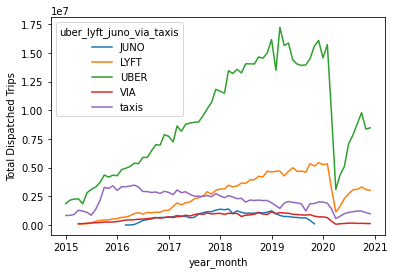

In [68]:
#Key Insight #3: similar to the line plot of private cars vs taxis, we see that Uber has the lion share followed by Lyft.
#also, we see that Juno has not progressed well over the years and stopped offering services since the end of 2019.
#this is in line with the news that Juno was acquired by her parent company and stopped transportation services since November 2019

#plotting the time series of "Total Dispatched Trips" with stratification by 'uber_lyft_juno_via_taxis'

sns.lineplot(x = "year_month", y = "Total Dispatched Trips", hue = 'uber_lyft_juno_via_taxis', ci=None,
             data = total_trips_privateuber_lyft_juno_via_taxis)


In [69]:
#using the method groupby to populate the trips based on 'seasons' 
total_trips_seasons = data.groupby(['seasons', 'uber_lyft_juno_via_taxis']).sum()
total_trips_seasons

Year   Month  Total Dispatched Trips  \
seasons uber_lyft_juno_via_taxis                                             
fall    JUNO                         24210      96                 9062121   
        LYFT                         36315     144                45647288   
        UBER                         36315     144               163780666   
        VIA                          36315     144                10887718   
        taxis                     17328668   68715                35373049   
spring  JUNO                         20178      21                 9391147   
        LYFT                         30270      30                44351665   
        UBER                         36315      36               167748417   
        VIA                          30270      30                11081712   
        taxis                     16343920   16159                38709731   
summer  JUNO                         24210      60                 7901223   
        LYFT                         36315      90                38325377   
        UBER                         36315      90               147256312   
        VIA                          36315      90                10267357   
        taxis                     17164845   42678                37510957   
winter  JUNO                         22191     120                 9357119   
        LYFT                         36315     198                52035037   
        UBER                         36315     198               184506509   
        VIA                          36315     198                11438353   
        taxis                     18341887  100011                41745699   

                                  Total Dispatched Shared Trips  \
seasons uber_lyft_juno_via_taxis                                  
fall    JUNO                                                  0   
        LYFT                                            6789775   
        UBER                                           20150983   
        VIA                                             5284657   
        taxis                                             21496   
spring  JUNO                                                  0   
        LYFT                                            8143177   
        UBER                                           21487053   
        VIA                                             5152965   
        taxis                                              5545   
summer  JUNO                                                  0   
        LYFT                                            5381310   
        UBER                                           16935384   
        VIA                                             4430401   
        taxis                                              1723   
winter  JUNO                                                  0   
        LYFT                                            8244725   
        UBER                                           21331178   
        VIA                                             5504039   
        taxis                                             17870   

                                  Unique Dispatched Vehicles  
seasons uber_lyft_juno_via_taxis                              
fall    JUNO                                          203483  
        LYFT                                          506669  
        UBER                                          922895  
        VIA                                            64872  
        taxis                                         339648  
spring  JUNO                                          172887  
        LYFT                                          484033  
        UBER                                          915074  
        VIA                                            61721  
        taxis                                         365597  
summer  JUNO                                          190354  
        LYFT               

### Key Insight #4. Please refer to the comments in the following cell

<AxesSubplot:xlabel='seasons', ylabel='Total Dispatched Trips'>

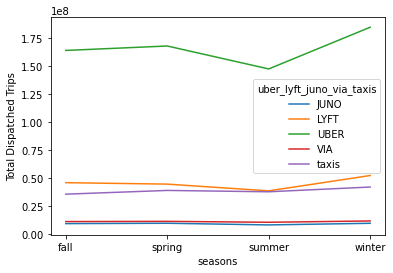

In [70]:
#Key Insight #4: as shown, there is a slight dip in demand for trips during summer over the years. the dip for Uber is higher
#as compared to the other operators. On the other hand, demand for rides is typically higher during winter.
#this could inform the allocation of resources for each company in tandem with seasonal effects on demand

#plotting the time series of "Total Dispatched Trips" with stratification by 'uber_lyft_juno_via_taxis'

sns.lineplot(x = "seasons", y = "Total Dispatched Trips", hue = 'uber_lyft_juno_via_taxis', ci=None,
             data = total_trips_seasons)


### Key Insight #5. Please refer to the comments in the following cell

<AxesSubplot:xlabel='seasons', ylabel='Total Dispatched Trips'>

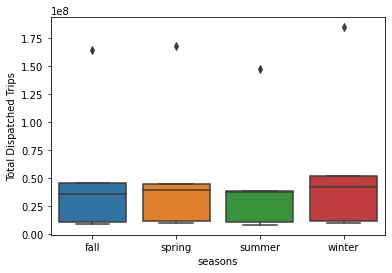

In [71]:
#Insight 5: similar to the earlier lineplot, the demand during summer is weaker while demand during winter is higher than average
#the maximum trips as shown by the dots correspond to that for Uber.
#with the same conclusion as that from the lineplot, we could inform the allocation of resources for each company in tandem with seasonal effects on demand

#extracting out the 'seasons' index from the multi-index before creating a new column 'seasons' to store the values
total_trips_seasons['seasons'] = total_trips_seasons.index.get_level_values('seasons')

#creating a boxplot to show the trends of median, lower and upper quartiles, min and max of trips per season
sns.boxplot(y="Total Dispatched Trips", x="seasons", data = total_trips_seasons)

## End of seaborn visualization and analysis for insights

## Start of Time Series Analyses using fbprophet package - further augments and reinforce the insights gleaned from the earlier seaborn visualizations



### Key Insight #6. The time-series analyses for private_cars show that demand would be on an increasing trajectory. This aligns with the earlier insight from visualization using seaborn.



### Key Insight #7. In contrast, time-series analyses for taxis show that the demand is going to decrease over time. Similarly, this aligns with the insights from seaborn plots. 

In [72]:
#viewing the first few records of the dataframe that we will be using
total_trips_private_cars_or_taxis.head()

Year  Month  Total Dispatched Trips  \
year_month private_cars_or_taxis                                         
2015-01-01 private_cars            2015      1                 1871075   
           taxis                  98735     49                  828162   
2015-02-01 private_cars            2015      2                 2178305   
           taxis                  96720     96                  844752   
2015-03-01 private_cars            2015      3                 2259575   

                                  Total Dispatched Shared Trips  \
year_month private_cars_or_taxis                                  
2015-01-01 private_cars                                       0   
           taxis                                              0   
2015-02-01 private_cars                                       0   
           taxis                                              0   
2015-03-01 private_cars                                       0   

                                  Unique Dispatched Vehicles  prop_of_trips  
year_month private_cars_or_taxis                                             
2015-01-01 private_cars                                12544           69.3  
           taxis                                        7801           30.7  
2015-02-01 private_cars                                13531           72.1  
           taxis                                        7640           27.9  
2015-03-01 private_cars                                14290           71.0

In [73]:
#importing the relevant packages for the time-series analyses
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from fbprophet import Prophet


## Splitting the dataset into training and testing subsets for private_cars and taxis

In [74]:
#splitting the dataset into training and testing subsets for private_cars and taxis respectively

train = total_trips_private_cars_or_taxis.iloc[:101, :]
train = train.reset_index()
train_private_cars = train[train['private_cars_or_taxis'] == 'private_cars']
train_taxis = train[train['private_cars_or_taxis'] == 'taxis']

test = total_trips_private_cars_or_taxis.iloc[101:, :]
test = test.reset_index()
test_private_cars = test[test['private_cars_or_taxis'] == 'private_cars']
test_taxis = test[test['private_cars_or_taxis'] == 'taxis']


## Extracting the 2 columns containing the datetime and variable we are predicting (i.e. total trips) followed by renaming of these columns to 'ds' and 'y' respectively as these are the columns required for the model. 

In [75]:
#pulling out the 'year_month' and 'Total Dispatched Trips' columns for the time series analyses using fbprophet

train_private_cars_trips = train_private_cars[['year_month', 'Total Dispatched Trips']]
train_taxis_trips = train_taxis[['year_month', 'Total Dispatched Trips']]

test_private_cars_trips = test_private_cars[['year_month', 'Total Dispatched Trips']]
test_taxis_trips = test_taxis[['year_month', 'Total Dispatched Trips']]


In [76]:
#converting the columns names to "ds" and "y" respectively as these are the required columns names for fbprophet

train_private_cars_trips.columns = ['ds', 'y']
train_taxis_trips.columns = ['ds', 'y']

test_private_cars_trips.columns = ['ds', 'y']
test_taxis_trips.columns = ['ds', 'y']


## Fitting the time-series model for private_cars using the training subset

In [77]:
#fitting the time-series model for train_private_cars_trips. 
#adding a yearly seasonality to the model through add_seasonality() function
#this model will be used subsequently to predict/ forecast the trips demand for private cars

model = Prophet(interval_width=0.95, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=2)
model.add_seasonality(name='yearly', period=365, fourier_order=5, prior_scale=0.02)

model.fit(train_private_cars_trips)


## Predicting and visualizing the trends of total trips for private_cars

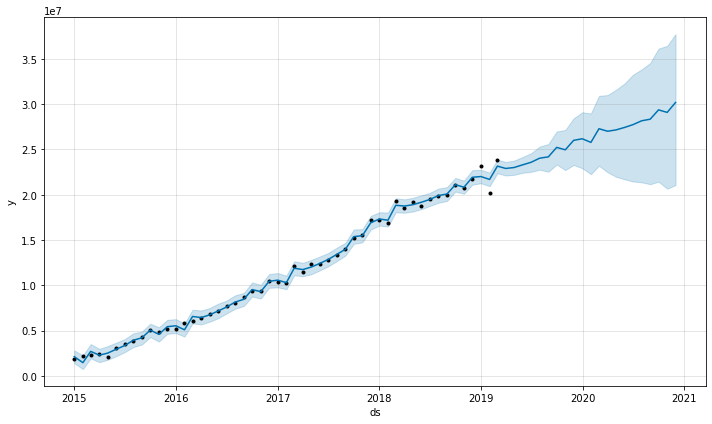

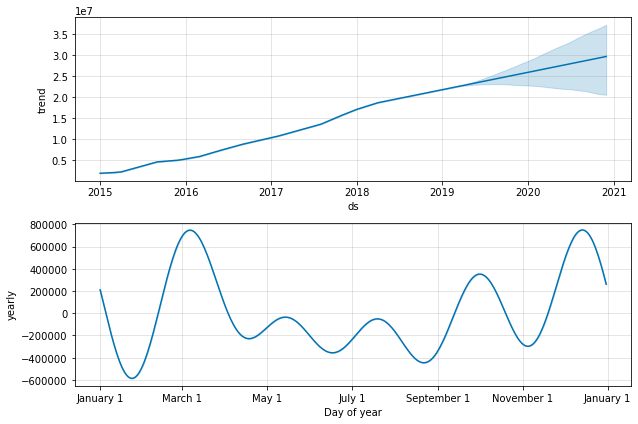

In [78]:
#finding the num of months (rows/ periods) for test data
periods_forecast_private_cars_trips = test_private_cars_trips.shape[0]

#predicting the num of trips going forward for private cars
future_private_cars = model.make_future_dataframe(periods = periods_forecast_private_cars_trips, freq = 'M')
forecast_private_cars = model.predict(future_private_cars)

#plot the forecast of trips for private cars
fig_private_cars = model.plot(forecast_private_cars)

#use the plot_components() function to visualize overall trend and components of the time series
fig_private_cars = model.plot_components(forecast_private_cars)

## Fitting the time-series model for taxis using the training subset

In [79]:
#fitting the time-series model for train_private_cars_trips
model2 = Prophet(interval_width=0.95, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=2)
model2.add_seasonality(name='yearly', period=365, fourier_order=5, prior_scale=0.02)

model2.fit(train_taxis_trips)


## Predicting and visualizing the trends of total trips for taxis

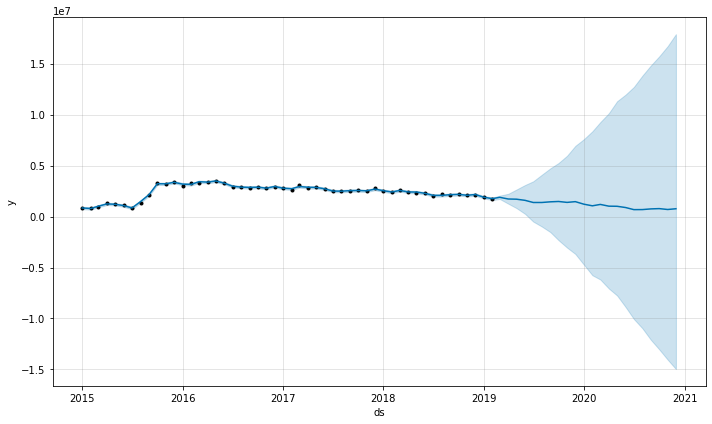

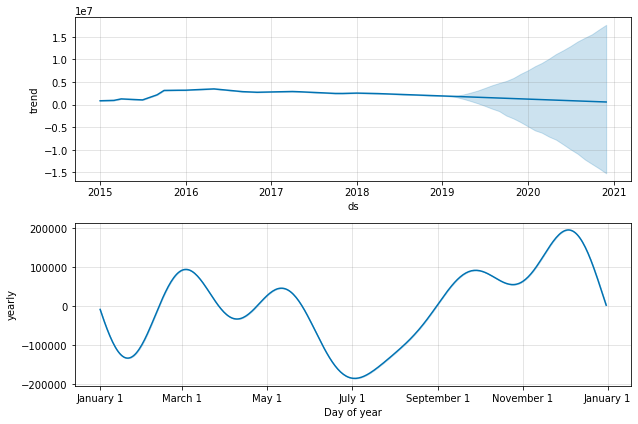

In [80]:
#finding the num of months (rows/ periods) for test data
periods_forecast_taxis_trips = test_taxis_trips.shape[0]

#predicting the num of trips going forward for taxis
future_taxis = model2.make_future_dataframe(periods = periods_forecast_taxis_trips, freq = 'M')
forecast_taxis = model2.predict(future_taxis)

#plot the forecast of trips for taxis
fig_taxis = model2.plot(forecast_taxis)

#use the plot_components() function to visualize overall trend and components of the time series
fig_taxis = model2.plot_components(forecast_taxis)


## End of fbprohpet usage for time-series analyses to generate insights